In [30]:
import numpy as np
import os
import pytesseract
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter

In [204]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [205]:
path = "data/images/car_10.jpg"

In [206]:
image = cv2.imread(path)

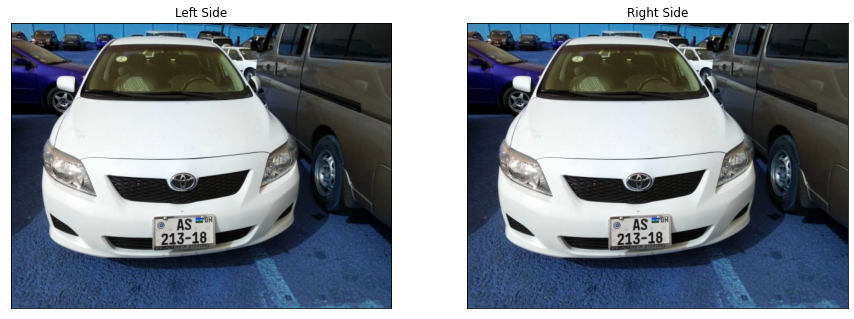

In [207]:
plot_images(image, image, title1 = "Left Side", title2 = "Right Side")

In [208]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

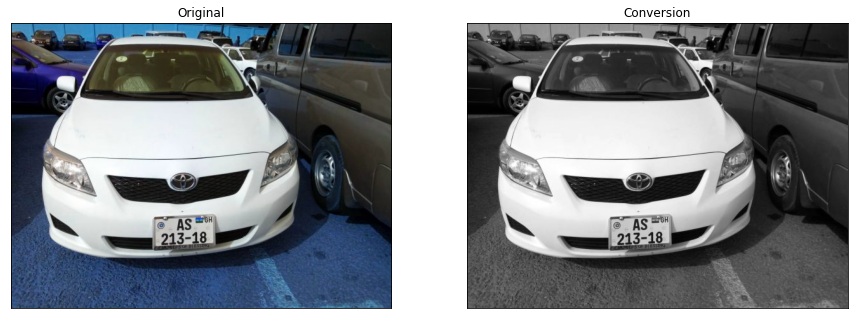

In [209]:
plot_images(image, gray, title1 = "Original", title2 = "Conversion")

In [210]:
blur = cv2.bilateralFilter(gray, 11, 90, 90)

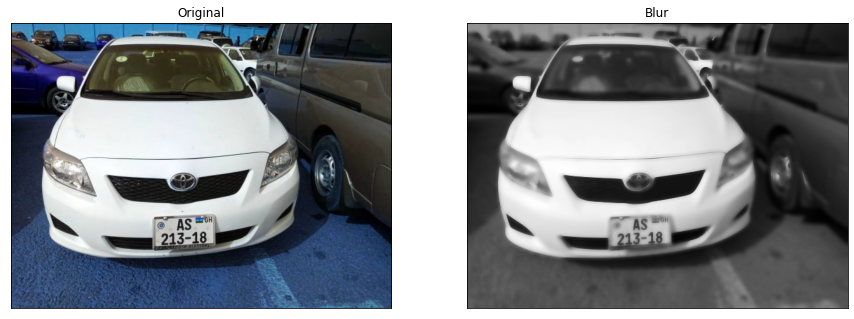

In [211]:
plot_images(image, blur, title1 = "Original", title2 = "Blur")

In [212]:
edges = cv2.Canny(blur, 30, 200)

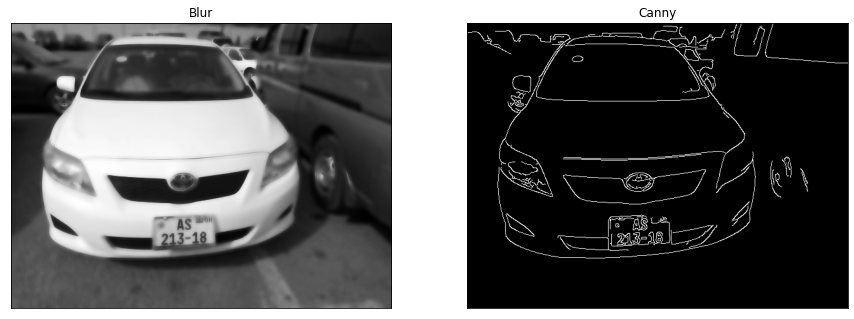

In [213]:
plot_images(blur, edges,  title2 = "Canny", title1 = "Blur")

In [214]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [215]:
image_copy = image.copy()

In [216]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255), 2)

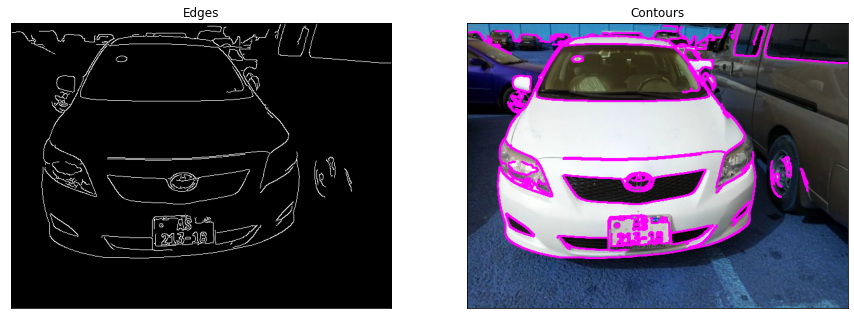

In [217]:
plot_images(edges, image_copy, title1 = "Edges", title2 = "Contours")

In [218]:
print(len(cnts))

99


In [219]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]

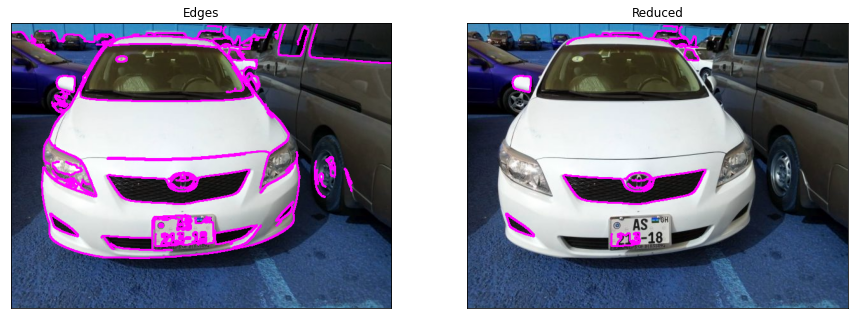

In [220]:
image_reduced_cnts = image.copy()
_ = cv2.drawContours(image_reduced_cnts, cnts, -1, (255,0,255), 2)
plot_images(image_copy, image_reduced_cnts, title1 = "Edges", title2 = "Reduced")

In [221]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break
        
cv2.imwrite("plate.png", plate)

True

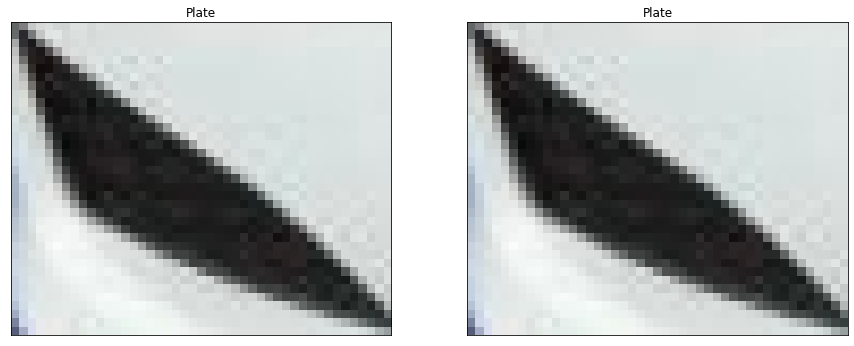

In [222]:
plot_images(plate, plate, title1 = "Plate", title2 = "Plate")

In [223]:
text = pytesseract.image_to_string(plate, lang="eng")
text = text.replace(" ","")

In [203]:
print(text)